Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

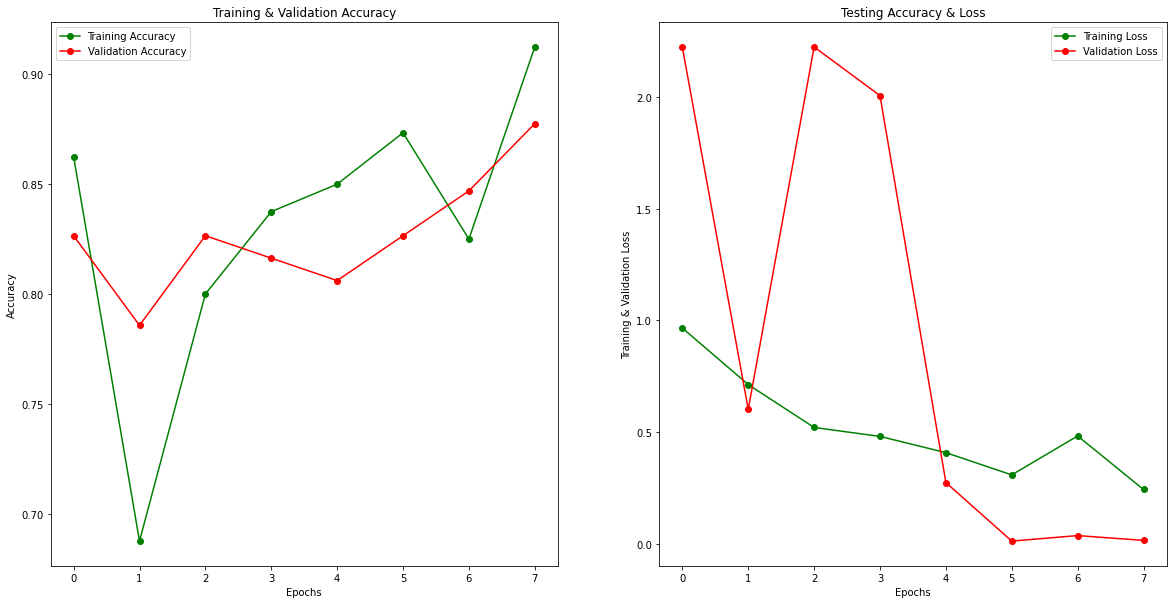

{'caries': 0, 'without_caries': 1}
AI's prediction is: cavity


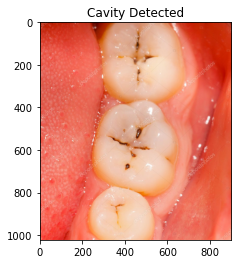

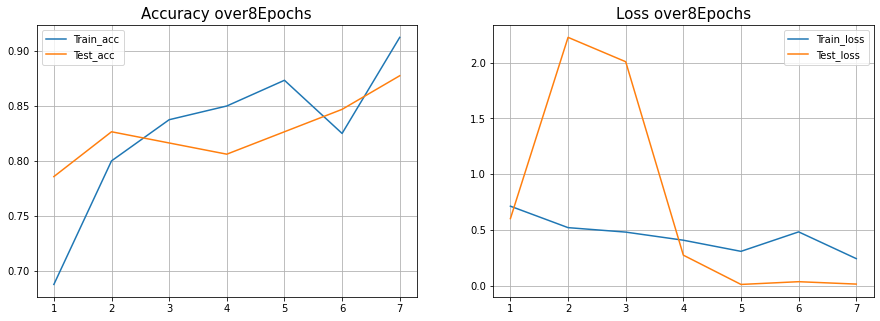

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

IMAGE_SIZE = [256, 256]

train_path = '../environment/teeth_dataset/Trianing'
test_path = '../environment/teeth_dataset/Test'

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

vgg.input

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rescale=1./255,
        featurewise_center=False,samplewise_center=False, featurewise_std_normalization=False,  
        samplewise_std_normalization=False, zca_whitening=False, rotation_range = 30,  
        zoom_range = 0.2,width_shift_range=0.1, height_shift_range=0.1,
        horizontal_flip = True,vertical_flip=False)
        

test_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rescale=1./255, rotation_range = 30,  
        zoom_range = 0.2,width_shift_range=0.1, height_shift_range=0.1,
        horizontal_flip = True,vertical_flip=False)

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        test_path,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

history = model.fit(x = train_set, validation_data = test_set, epochs = 8, steps_per_epoch=5,  callbacks=callbacks)


duration = datetime.now() - start
print("Training completed in time: ", duration)

epochs = [i for i in range(8)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r'C:\Users\HAFEEZ KHAN\Desktop\Cavity Dataset\cavity\10.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(train_set.class_indices)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(r'C:\Users\HAFEEZ KHAN\Desktop\Cavity Dataset\cavity\10.jpg')
imgplot = plt.imshow(img)
plt=plt.title('Cavity Detected')

if result[0][0] == 1:
    prediction = 'healthy teeth'
else:
    prediction = 'cavity'
    
print("AI's prediction is: "+ prediction)

import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
    acc = results.history['accuracy']
    loss = results.history['loss']
    val_acc = results.history['val_accuracy']
    val_loss = results.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_acc_loss(history, 8)